# Assignment 3: Reinforcement Learning Pipeline in Practice


*CS260R: Reinforcement Learning. Department of Computer Science at University of California, Los Angeles.
Course Instructor: Professor Bolei ZHOU. Assignment author: Zhenghao PENG.*

-----


## TODOs

You need to implement all TODOs in the python files. Then run all cells in this notebook and plot your results. 

Note:

1. You can run the training in your terminal and selectively run the visualization and evaluation cells in this notebook.
2. You need to remove the "REFERENCE" in figures.
3. You don't need to exactly reproduce our results, but your implementation should show the similar progress in training.
4. We use multi-processing to enable asynchronous data sampling. Therefore in many places the tensors have shape `[num_steps, num_envs, num_feat]`. This means that `num_envs` environments are running concurrently and each of them samples a fragment of trajectory with length `num_steps`. There are totally `num_steps*num_envs` transitions are generated in each training iteration.
5. Each process can only have a single MetaDrive environment.
6. The jupyter notebook is used for tutorial and visualization. It is optional for you to use the notebook to call `train_ppo|td3.py` and `eval_ppo|td3.py`. But we expect to see figures, results and visualization in this notebook.




We are expecting the following figures, results and visualization:

1. TD3 in Pendulum-v1: learning curve (2.1)
2. TD3 in MetaDrive-Tut-Hard-v0: learning curve (2.2), evaluation result (2.3)
3. PPO in CartPole-v1: learning curve (3.1)
4. PPO in MetaDrive-Tut-Hard-v0: learning curve (3.2), evaluation result (3.3), visualization (3.4)


### File structure

You need to pay attention to the files below:

TD3: 

* `core/td3_trainer.py` - File which can be directly run to train TD3. **Please implement TD3 here.**

PPO:

* `train_ppo.py` - Train scripts for PPO in CartPole-v0 and MetaDrive. **Please implement TODO in this file.**
* `core/ppo_trainer.py` - PPO algorithm. **Please implement `compute_action` and `compute_loss`.**
* `core/buffer.py` - Supporting data structure for PPO (GAE is implemented here). **Please implement `compute_returns` for PPO.**

Common:

* `assignment3.ipynb` - Useful jupyter notebook to walk you through the whole assignment. You need to plot figures and results here.
* `[train|eval]_[ppo|td3].py` - The entries to training and evaluation.


### Deliverables

1) The exported **PDF file** of the this notebook.
2) Compress all files in the `assignment3` folder and prepare a **ZIP file**. No `.rar` or other format is allowed.

You need to submit **both the ZIP file and the PDF file** to bruinlearn. The PDF file goes to gradescope tab and the 
ZIP file goes to the assignment tab.



### Colab supporting

Though we use multiple files to implement algorithms, we can still leverage Colab for free computing resources. 

* Step 1: Create a folder in your Google Drive root named `cs260r`
* Step 2: Upload the files in `assignment3` folder such as `train_ppo.py` and the folder `core` to the newly created `cs260r` folder in your Google Drive.
* Step 3: Run the last cell in Demo 1 (pay attention to the code we mount the colab to your google drive).




## Demo 1: Setup dependencies

In [1]:
!pip install torch

# Install MetaDrive, a lightweight driving simulator
!pip install git+https://github.com/metadriverse/metadrive

# Test whether MetaDrive is properly installed. No error means the test is passed.
!python -m metadrive.examples.profile_metadrive --num-steps 100

!pip install pandas scipy seaborn tabulate pyyaml

  Cloning https://github.com/metadriverse/metadrive to /tmp/pip-req-build-1s9qs3dt
  Running command git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /tmp/pip-req-build-1s9qs3dt
  Resolved https://github.com/metadriverse/metadrive to commit bb0a0c64f776769340b7daff81c154c04c8aa3a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 MB 27.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: panda3d
    Found existing installation: Panda3D 1.10.13
    Uninstalling Panda3D-1.10.13:
      Successfully uninstalled Panda3D-1.10.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
metadrive-simulator 0.4.3 requires panda3d==1.10.13, but you have panda3d 1.10.14 which is incompatible.
Start to profile the efficiency of MetaDrive with 1000 maps and ~4 vehicles!
[INFO] Environment: MetaDrive

In [23]:
import os

try:
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My Drive/cs260r'  # No need for backslash
    if not os.path.exists(DRIVE_PATH):
        !mkdir -p "$DRIVE_PATH"  # Ensure the folder exists

    # Create a symlink to avoid issues with spaces in 'My Drive'
    SYM_PATH = '/content/cs260r'
    if not os.path.exists(SYM_PATH):
        !ln -s "$DRIVE_PATH" "$SYM_PATH"

    running_in_colab = True
    
    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs260r'

except ModuleNotFoundError:
    running_in_colab = False
    print("I guess you are running locally. If you get this message in Colab, something is wrong.")

print("\nCurrent working directory:")
!pwd

print("\nWhat files are there:")
!ls

I guess you are running locally. If you get this message in Colab, something is wrong.

Current working directory:
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION

What files are there:
assignment3.ipynb  eval_td3.py		   MetaDrive-Tut-Hard-v0  train_ppo.py
core		   __init__.py		   __pycache__		  train_td3.py
eval_ppo.py	   metadrive-hard-ppo.png  README.md		  vis.py


## Demo 2: Train a TD3 agent

Spinning Up tutorial provides great explaination on TD3 algorithm:
https://spinningup.openai.com/en/latest/algorithms/td3.html

Please implement all TODOs in `core/td3_trainer.py` and `train_td3.py`.

### Demo 2.1: Train TD3 agent in Pendulum-v1

In [3]:
!python train_td3.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
Training Step:   2%|▍                    | 1001/50000 [00:00<00:09, 5260.50it/s]
 ===== TD3 Training Step 1199 =====:
  actor_loss: 7.457189559936523
  critic_loss: 0.7158770561218262
  current_q1: -7.677007675170898
  current_q2: -7.640254974365234
  episode_reward: -1069.4446991966872
  frame_per_second: 2390
  log_dir: Pendulum-v1
  reward: -5.348049640655518
  target_q: -7.612714767456055
  total_episodes: 6
  total_steps: 1199
  total_time: 0.5016450881958008

Trainer is saved at <Pendulum-v1/td3>. Progress is saved at <Pendulum-v1/td3/progress.csv>.
Training Step:   4%|▉                     | 2193/50000 [00:01<00:55, 860.92it/s]
 ===== TD3 Training Step 2199 =====:
  actor_loss: 21.713417053222656
  critic_loss: 2.839542865753174
  current_q1: -22.078868865966797
  current_q2: -22.12277603149414
  episode_reward: -1281.6943638202513
  frame_per_second: 1115
  log_dir: Pendulum-v1
  rewar

Training Step:  32%|██████▊              | 16167/50000 [00:40<01:30, 375.44it/s]
 ===== TD3 Training Step 16199 =====:
  actor_loss: 72.69815063476562
  critic_loss: 128.2265625
  current_q1: -73.57456970214844
  current_q2: -74.14036560058594
  episode_reward: -680.9260433828304
  frame_per_second: 401
  log_dir: Pendulum-v1
  reward: -2.6791324615478516
  target_q: -74.1102066040039
  total_episodes: 81
  total_steps: 16199
  total_time: 40.33248043060303

Training Step:  34%|███████▏             | 17189/50000 [00:42<01:26, 378.51it/s]
 ===== TD3 Training Step 17199 =====:
  actor_loss: 77.4623794555664
  critic_loss: 689.0700073242188
  current_q1: -78.88629913330078
  current_q2: -78.80696868896484
  episode_reward: -647.1378148487769
  frame_per_second: 400
  log_dir: Pendulum-v1
  reward: -2.850228786468506
  target_q: -77.1039047241211
  total_episodes: 86
  total_steps: 17199
  total_time: 42.948888301849365

Training Step:  36%|███████▋             | 18186/50000 [00:45<01:21, 

Training Step:  62%|█████████████        | 31184/50000 [01:19<00:49, 378.13it/s]
 ===== TD3 Training Step 31199 =====:
  actor_loss: 57.108482360839844
  critic_loss: 9.178396224975586
  current_q1: -59.00981140136719
  current_q2: -58.80298614501953
  episode_reward: -200.778472516923
  frame_per_second: 393
  log_dir: Pendulum-v1
  reward: -1.972429871559143
  target_q: -59.03792190551758
  total_episodes: 156
  total_steps: 31199
  total_time: 79.25751399993896

Training Step:  64%|█████████████▌       | 32167/50000 [01:21<00:45, 391.35it/s]
 ===== TD3 Training Step 32199 =====:
  actor_loss: 59.66524887084961
  critic_loss: 93.14405822753906
  current_q1: -61.41571044921875
  current_q2: -62.481597900390625
  episode_reward: -196.8070597928082
  frame_per_second: 393
  log_dir: Pendulum-v1
  reward: -2.1881706714630127
  target_q: -61.651641845703125
  total_episodes: 161
  total_steps: 32199
  total_time: 81.87347602844238

Training Step:  66%|█████████████▉       | 33196/50000 [0

Training Step:  92%|███████████████████▍ | 46160/50000 [01:58<00:10, 378.10it/s]
 ===== TD3 Training Step 46199 =====:
  actor_loss: 41.18963623046875
  critic_loss: 5.985413551330566
  current_q1: -42.24983215332031
  current_q2: -42.1125373840332
  episode_reward: -141.96592916536687
  frame_per_second: 390
  log_dir: Pendulum-v1
  reward: -1.6121792793273926
  target_q: -42.01410675048828
  total_episodes: 231
  total_steps: 46199
  total_time: 118.45861506462097

Training Step:  94%|███████████████████▊ | 47169/50000 [02:01<00:09, 297.47it/s]
 ===== TD3 Training Step 47199 =====:
  actor_loss: 43.8442268371582
  critic_loss: 6.870794296264648
  current_q1: -44.912376403808594
  current_q2: -44.30426788330078
  episode_reward: -147.8364046261076
  frame_per_second: 389
  log_dir: Pendulum-v1
  reward: -1.65263032913208
  target_q: -44.77532196044922
  total_episodes: 236
  total_steps: 47199
  total_time: 121.31442594528198

Training Step:  96%|████████████████████▏| 48192/50000 [02

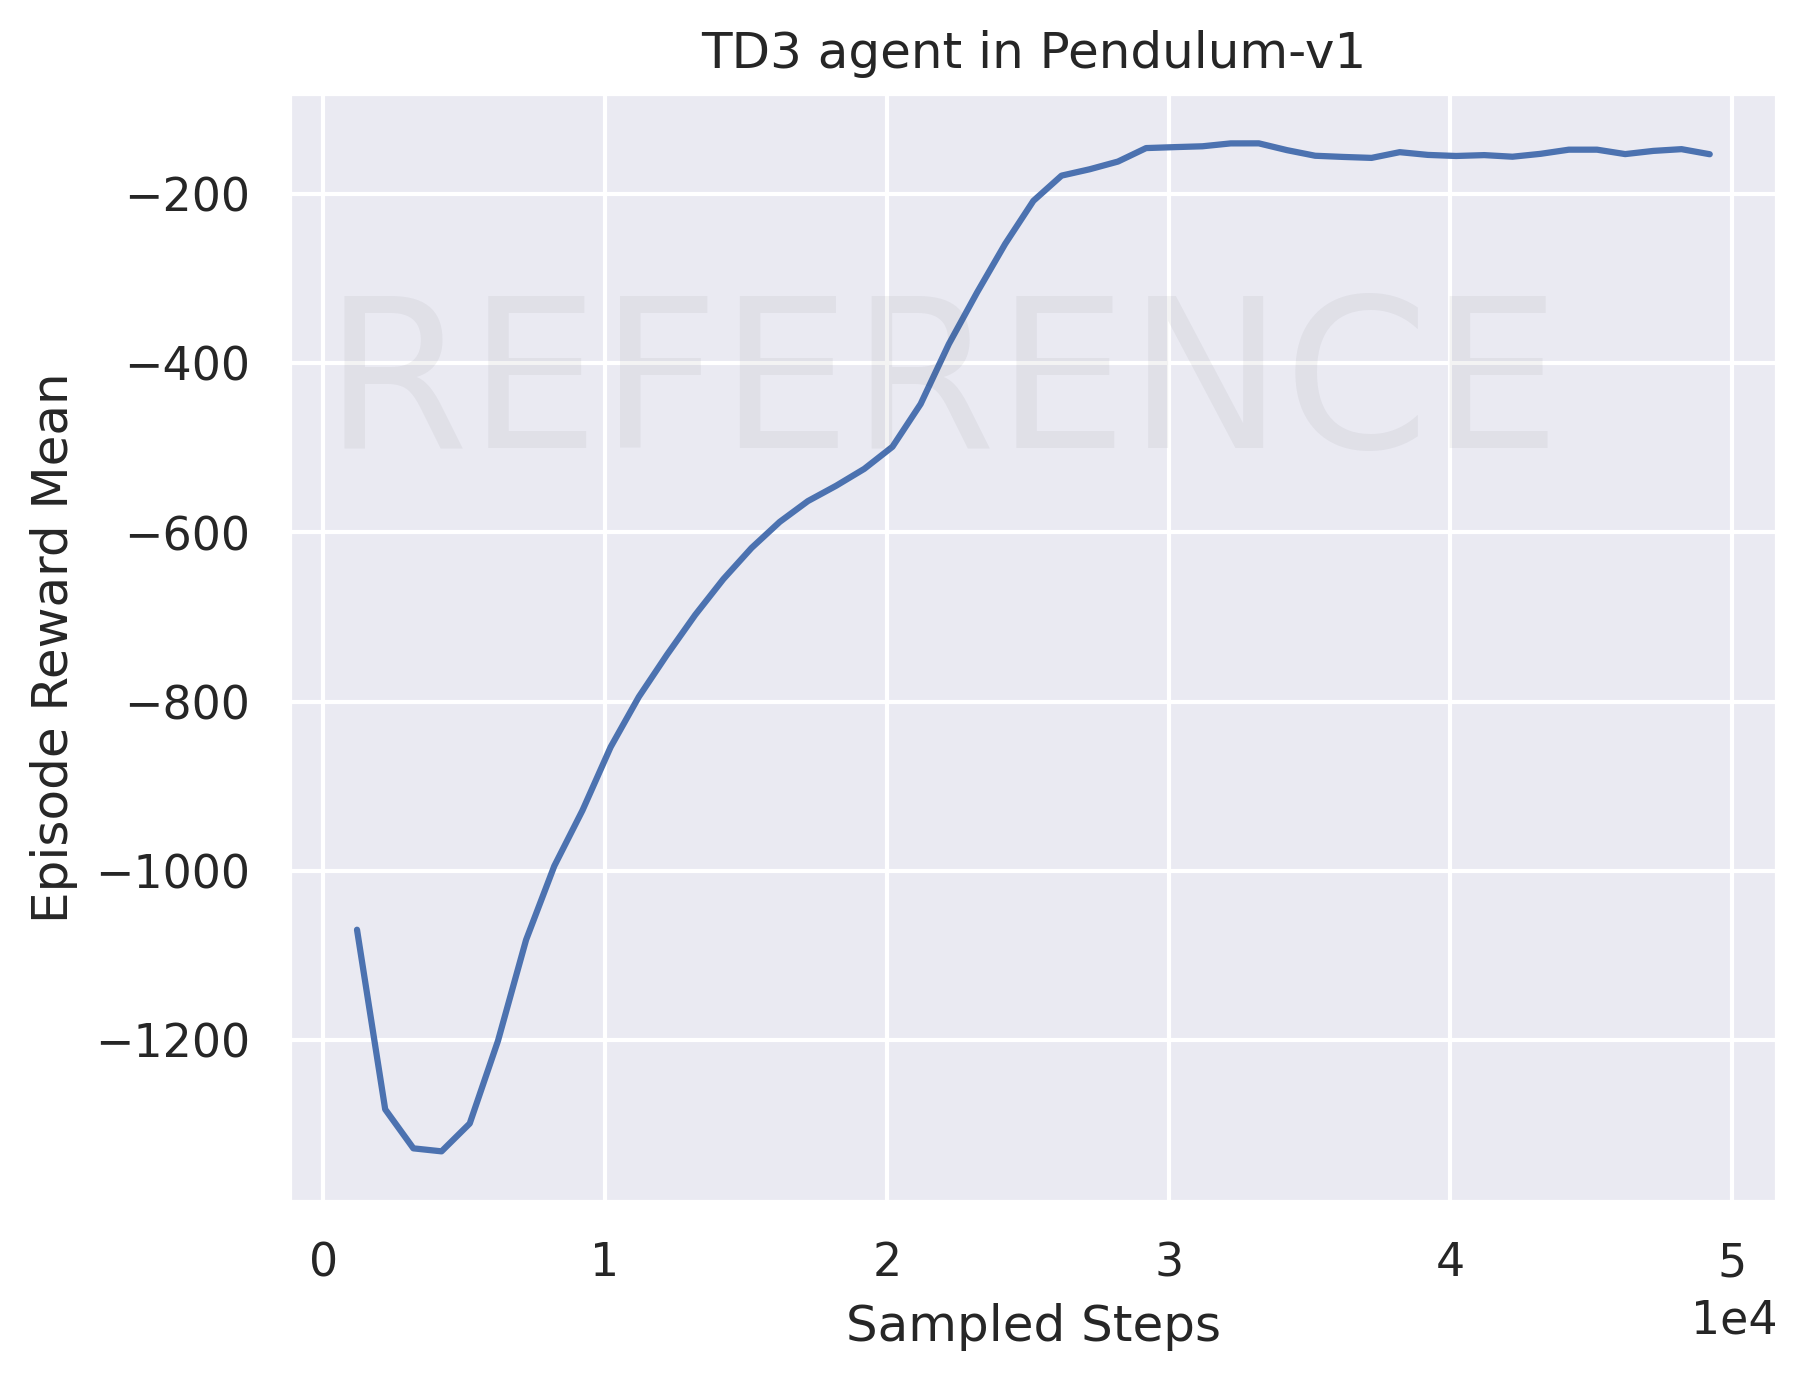

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
ax.annotate("REFERENCE", (0, -500), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.2: Train TD3 agent in MetaDrive-Tut-Hard-v0


In [17]:
!python train_td3.py \
--env-id MetaDrive-Tut-Hard-v0 \
--log-dir MetaDrive-Tut-Hard-v0 \
--max-steps 100_000


/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.3
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 20
Training Step:   1%|▏                     | 994/100000 [00:01<02:06, 780.63it/s][INFO] Episode ended! Scenario Index: 1008 Reason: max step 
[INFO] Episode ended! Scenario Index: 1013 Reason: max step .84it/s]

 ===== TD3 Training Step 1999 =====:
  actor_loss: .nan
  c

[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
Training Step:  10%|██                  | 10376/100000 [00:17<09:16, 160.98it/s][INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
Training Step:  10%|██                  | 10440/100000 [00:17<07:52, 189.43it/s][INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
Training Step:  12%|██▎                 | 11757/100000 [00:23<05:42, 257.75it/s][INFO] Episode ended! Scenario Index: 1019 Reason: max step 

 ===== TD3 Training Step 11771 =====:
  actor_loss: -0.08249866962432861
  critic_loss: 0.3871615529060364
  current_q1: 0.0761580765247345
  current_q2: 0.07832787185907364
  episode_reward: -0.22547066381412637
  frame_per_second: 507
  log_dir: MetaDrive-Tut-Hard-v0
  reward: -0.019502760842442513
  success_rate: 0.0
  target_q: 0.0534001961350441
  total_episodes: 49
  to

Training Step:  15%|██▉                 | 14995/100000 [00:38<06:37, 213.98it/s][INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.

 ===== TD3 Training Step 15010 =====:
  actor_loss: .nan
  critic_loss: 0.01869867369532585
  current_q1: 0.14341141283512115
  current_q2: 0.17154940962791443
  episode_reward: 2.5321075261547685
  frame_per_second: 392
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.04033861309289932
  success_rate: 0.0
  target_q: 0.20022353529930115
  total_episodes: 84
  total_steps: 15010
  total_time: 38.21257162094116

Training Step:  16%|███▏                | 16023/100000 [00:43<07:17, 191.96it/s][INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.

 ===== TD3 Training Step 16023 =====:
  actor_loss: -0.25212255120277405
  critic_loss: 0.5498141646385193
  current_q1: 0.21890269219875336
  current_q2: 0.2168390452861786
  episode_reward: 3.4348468957686555
  frame_per_second: 370
  log_dir: MetaDrive-Tut-Hard-v0
  reward: -0.022618252784013748

Training Step:  17%|███▍                | 17008/100000 [00:48<08:02, 171.96it/s][INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.

 ===== TD3 Training Step 17008 =====:
  actor_loss: .nan
  critic_loss: 0.45236116647720337
  current_q1: 0.4631882309913635
  current_q2: 0.4676404893398285
  episode_reward: 6.121880155121676
  frame_per_second: 349
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.042396511882543564
  success_rate: 0.0
  target_q: 0.4679073989391327
  total_episodes: 118
  total_steps: 17008
  total_time: 48.6466965675354

Training Step:  18%|███▌                | 18030/100000 [00:53<06:42, 203.44it/s][INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.

 ===== TD3 Training Step 18035 =====:
  actor_loss: -0.8112460374832153
  critic_loss: 0.03929625451564789
  current_q1: 0.7199206948280334
  current_q2: 0.6934407949447632
  episode_reward: 9.888810384189764
  frame_per_second: 334
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.09695728868246078
  succ

Training Step:  21%|████▏               | 21202/100000 [01:11<07:10, 182.98it/s][INFO] Episode ended! Scenario Index: 1000 Reason: arrive_dest.

 ===== TD3 Training Step 21203 =====:
  actor_loss: -2.3202385902404785
  critic_loss: 0.5494236350059509
  current_q1: 2.228926658630371
  current_q2: 2.2375378608703613
  episode_reward: 24.183467635421394
  frame_per_second: 294
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.1507592499256134
  success_rate: 0.02
  target_q: 2.115391731262207
  total_episodes: 159
  total_steps: 21203
  total_time: 71.94248270988464

Training Step:  22%|████▍               | 22111/100000 [01:16<07:03, 183.89it/s][INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.

 ===== TD3 Training Step 22125 =====:
  actor_loss: -2.7256274223327637
  critic_loss: 0.6449768543243408
  current_q1: 2.6043405532836914
  current_q2: 2.6767544746398926
  episode_reward: 28.97320855464373
  frame_per_second: 288
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.151525378227

Training Step:  30%|██████              | 30063/100000 [02:08<06:21, 183.23it/s][INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.

 ===== TD3 Training Step 30064 =====:
  actor_loss: .nan
  critic_loss: 0.6604428887367249
  current_q1: 9.704032897949219
  current_q2: 9.744277954101562
  episode_reward: 89.89357234003174
  frame_per_second: 233
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.34900417923927307
  success_rate: 0.16
  target_q: 9.755277633666992
  total_episodes: 179
  total_steps: 30064
  total_time: 128.7107264995575

Training Step:  31%|██████▏             | 31019/100000 [02:14<07:08, 160.85it/s][INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 

 ===== TD3 Training Step 31024 =====:
  actor_loss: .nan
  critic_loss: 1.2097344398498535
  current_q1: 10.245949745178223
  current_q2: 10.210238456726074
  episode_reward: 97.34057146536742
  frame_per_second: 229
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.3257661461830139
  success_rate: 0.17
  t

Training Step:  38%|███████▌            | 38013/100000 [02:57<06:26, 160.41it/s][INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 

 ===== TD3 Training Step 38018 =====:
  actor_loss: .nan
  critic_loss: 2.4478814601898193
  current_q1: 18.004962921142578
  current_q2: 17.98291015625
  episode_reward: 153.01297791694182
  frame_per_second: 213
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.4796959161758423
  success_rate: 0.23
  target_q: 17.71392059326172
  total_episodes: 207
  total_steps: 38018
  total_time: 177.94416642189026

Training Step:  39%|███████▉            | 39441/100000 [03:07<06:13, 162.15it/s][INFO] Episode ended! Scenario Index: 1011 Reason: arrive_dest.

 ===== TD3 Training Step 39448 =====:
  actor_loss: .nan
  critic_loss: 3.5636472702026367
  current_q1: 18.037643432617188
  current_q2: 17.981555938720703
  episode_reward: 163.95177439236176
  frame_per_second: 210
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.398660272359848
  success_rate: 0.24
  ta

Training Step:  46%|█████████▏          | 46126/100000 [03:48<05:23, 166.36it/s][INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 

 ===== TD3 Training Step 46126 =====:
  actor_loss: .nan
  critic_loss: 1.4406237602233887
  current_q1: 25.32389259338379
  current_q2: 25.481300354003906
  episode_reward: 214.0380101771422
  frame_per_second: 201
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.4811771512031555
  success_rate: 0.32
  target_q: 25.148826599121094
  total_episodes: 234
  total_steps: 46126
  total_time: 228.66905212402344

Training Step:  47%|█████████▍          | 47165/100000 [03:55<05:33, 158.54it/s][INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 

 ===== TD3 Training Step 47174 =====:
  actor_loss: .nan
  critic_loss: 5.848583698272705
  current_q1: 25.140871047973633
  current_q2: 25.208723068237305
  episode_reward: 222.5252299032532
  frame_per_second: 200
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.42959344387054443
  success_rate: 0.32

Training Step:  54%|██████████▊         | 54200/100000 [04:39<04:03, 187.81it/s][INFO] Episode ended! Scenario Index: 1012 Reason: arrive_dest.

 ===== TD3 Training Step 54200 =====:
  actor_loss: .nan
  critic_loss: 5.763998031616211
  current_q1: 29.874671936035156
  current_q2: 29.909915924072266
  episode_reward: 260.75617824903384
  frame_per_second: 193
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.4567113220691681
  success_rate: 0.36
  target_q: 30.02918243408203
  total_episodes: 259
  total_steps: 54200
  total_time: 279.56699991226196

Training Step:  55%|███████████         | 55017/100000 [04:43<04:43, 158.66it/s][INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 

 ===== TD3 Training Step 55018 =====:
  actor_loss: .nan
  critic_loss: 9.421670913696289
  current_q1: 32.19126892089844
  current_q2: 32.11695098876953
  episode_reward: 259.30229137955723
  frame_per_second: 193
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.46913254261016846
  success_rate: 0.35
  

Training Step:  63%|████████████▌       | 63080/100000 [05:27<03:46, 163.09it/s][INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 

 ===== TD3 Training Step 63087 =====:
  actor_loss: -38.14577865600586
  critic_loss: 3.357445001602173
  current_q1: 37.454429626464844
  current_q2: 37.36912155151367
  episode_reward: 248.76612039381405
  frame_per_second: 192
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6030117273330688
  success_rate: 0.31
  target_q: 37.320533752441406
  total_episodes: 284
  total_steps: 63087
  total_time: 327.9019455909729

Training Step:  64%|████████████▊       | 64080/100000 [05:32<03:16, 182.64it/s][INFO] Episode ended! Scenario Index: 1015 Reason: max step 

 ===== TD3 Training Step 64088 =====:
  actor_loss: .nan
  critic_loss: 12.707763671875
  current_q1: 37.50471878051758
  current_q2: 37.408103942871094
  episode_reward: 252.04995024344836
  frame_per_second: 192
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5016499757766724
  success_rate:

Training Step:  72%|██████████████▍     | 72066/100000 [06:17<02:19, 199.59it/s][INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 

 ===== TD3 Training Step 72073 =====:
  actor_loss: -42.569305419921875
  critic_loss: 3.166940212249756
  current_q1: 41.76539611816406
  current_q2: 41.98854064941406
  episode_reward: 266.9300724667057
  frame_per_second: 190
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.611711859703064
  success_rate: 0.39
  target_q: 42.06471252441406
  total_episodes: 306
  total_steps: 72073
  total_time: 377.6069393157959

Training Step:  73%|██████████████▋     | 73352/100000 [06:24<02:12, 201.08it/s][INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.

 ===== TD3 Training Step 73365 =====:
  actor_loss: -43.88701629638672
  critic_loss: 10.07028579711914
  current_q1: 43.252899169921875
  current_q2: 43.034942626953125
  episode_reward: 271.8240205868657
  frame_per_second: 190
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5868385434150696

Training Step:  81%|████████████████▎   | 81413/100000 [07:08<01:24, 219.18it/s][INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.

 ===== TD3 Training Step 81424 =====:
  actor_loss: .nan
  critic_loss: 8.761152267456055
  current_q1: 44.8770751953125
  current_q2: 44.79420471191406
  episode_reward: 284.13739883036436
  frame_per_second: 190
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.5926800966262817
  success_rate: 0.47
  target_q: 45.30968475341797
  total_episodes: 330
  total_steps: 81424
  total_time: 428.1787836551666

Training Step:  82%|████████████████▍   | 82134/100000 [07:11<01:31, 194.39it/s][INFO] Episode ended! Scenario Index: 1019 Reason: arrive_dest.

 ===== TD3 Training Step 82142 =====:
  actor_loss: .nan
  critic_loss: 6.187580108642578
  current_q1: 45.707820892333984
  current_q2: 45.97092056274414
  episode_reward: 284.650760214591
  frame_per_second: 190
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6163734197616577
  success_rate: 0.48
  target_q

Training Step:  90%|██████████████████  | 90289/100000 [07:55<00:44, 220.16it/s][INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.

 ===== TD3 Training Step 90305 =====:
  actor_loss: -48.178192138671875
  critic_loss: 12.65242862701416
  current_q1: 47.61727523803711
  current_q2: 47.6790771484375
  episode_reward: 294.8402909740364
  frame_per_second: 189
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.7082509994506836
  success_rate: 0.59
  target_q: 47.985836029052734
  total_episodes: 353
  total_steps: 90305
  total_time: 475.8824055194855

Training Step:  91%|██████████████████▎ | 91412/100000 [08:01<00:38, 224.48it/s][INFO] Episode ended! Scenario Index: 1004 Reason: arrive_dest.

 ===== TD3 Training Step 91432 =====:
  actor_loss: .nan
  critic_loss: 21.44839859008789
  current_q1: 49.34778594970703
  current_q2: 49.3743896484375
  episode_reward: 298.5187513586809
  frame_per_second: 189
  log_dir: MetaDrive-Tut-Hard-v0
  reward: 0.6310403347015381
  success_rate: 0

Training Step: 100%|███████████████████| 100000/100000 [08:49<00:00, 188.97it/s]


The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'current_q2', 'reward'],
      dtype='object')


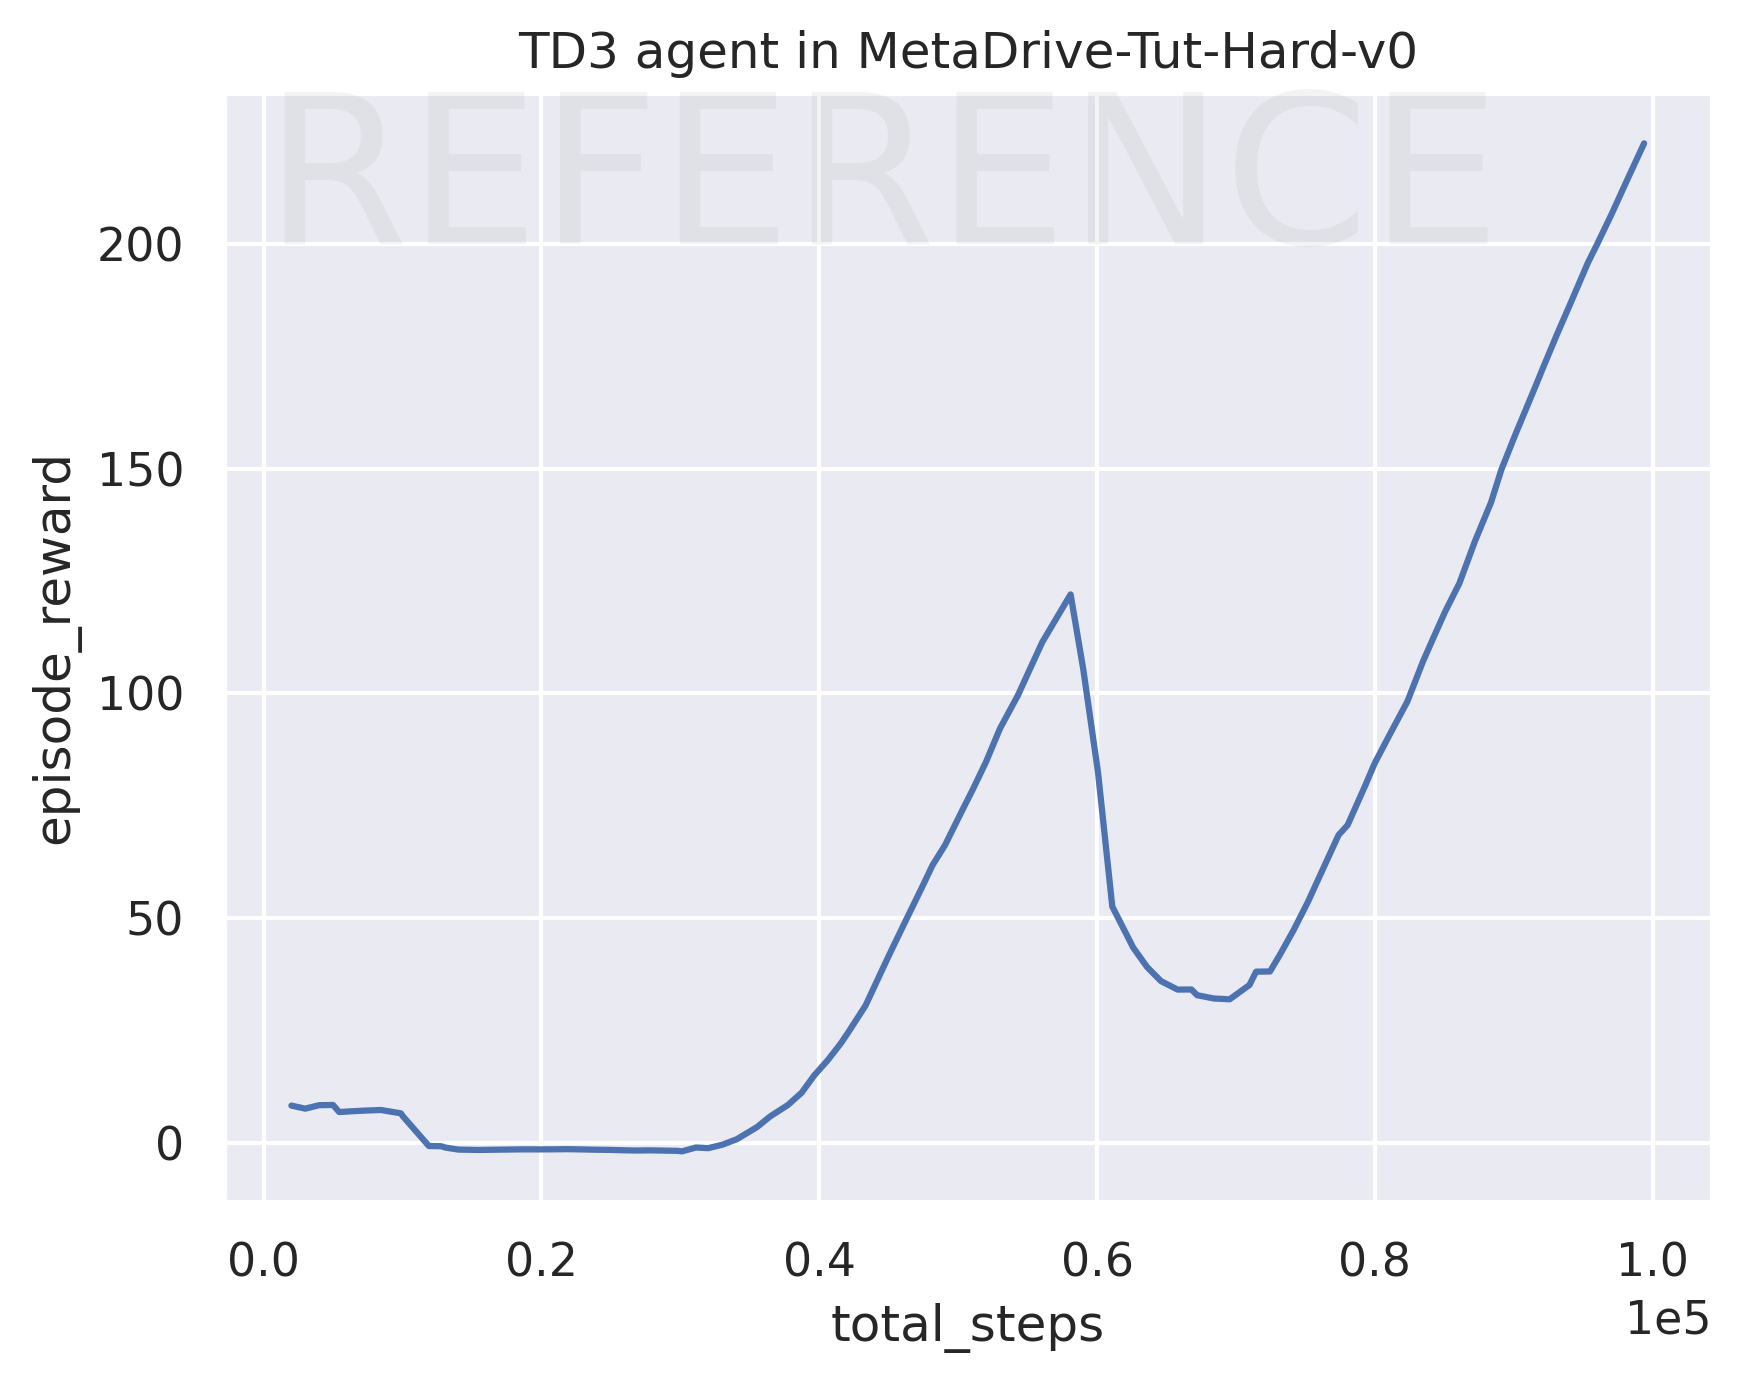

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: You should remove this line in your code.
ax.annotate("REFERENCE", (0, 200), size=50, alpha=0.05)

plt.savefig('metadrive-hard-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.3: Evaluate TD3 in MetaDrive

In [25]:
!python eval_td3.py \
--env-id="MetaDrive-Tut-Hard-v0" \
--log-dir="MetaDrive-Tut-Hard-v0/td3"


/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
/home/zhenghao/anaconda3/envs/go/envs/cs260r/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/zhenghao/anaconda3/envs/go/envs/cs260r/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in re

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

td3_eval = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/eval_results.csv")
print("TD3 agent average reward: {}".format(td3_eval.rewards.mean()))

TD3 agent average reward: 288.35753331357586


## Demo 3: Train a PPO agent

You need to finish `core/ppo_trainer.py`, `core/buffer.py` and `train_ppo.py`.

Here we use GAE [1] (Generalized Advantage Estimation) to estimate the advantage. This technique is implemented in `PPORolloutStorage.compute_returns` in `core/buffer.py`. Concretely, we estimate the advantage of current state $t$ via:

$$\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)$$

$$A^{GAE}_t = \sum_{l=0}^{\infty} (\gamma \lambda) ^ l \delta_{t+l}$$

wherein $V$ is the state value function, $\lambda$ is a hyper-parameter defined in `PPOConfig["gae_lambda"]`.

You can find that when $\lambda = 0$, the GAE estimates advantage in an one-step TD manner. When $\lambda = 1$, the GAE reduces to Monte Carlo Estimation of the state value. Therefore by varying the $\lambda$, we can adjust the trade-off between the accuracy of the estimation, namely the bias, and the variance of the advantage.

[1]: Schulman, John , et al. "High-Dimensional Continuous Control Using Generalized Advantage Estimation." (2015).

### Demo 3.1 Train and draw the learning curve of PPO in CartPole

In [19]:
!python train_ppo.py \
--env-id CartPole-v1 \
--log-dir CartPole-v1 \
--num-envs 10 \
--max-steps 300000

/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
Start training!
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-

 73%|████████████████████████▏        | 220000/300000 [00:50<00:18, 4404.18it/s]
 ===== ppo Training Iteration 11 =====:
  adv_mean: 1.5714004039764404
  entropy: 0.49204333462776284
  episode_reward: 473.94
  frame_per_second: 4272
  grad_norm: 69.8422276203449
  iteration: 11
  log_dir: /home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/CartPole-v1/ppo
  policy_loss: -0.0019843898235987396
  ratio: 0.9999709460215691
  total_episodes: 2484
  total_loss: 96.44101764238798
  total_steps: 240000
  total_time: 56.16992402076721
  value_loss: 96.4430019231943

 80%|██████████████████████████▍      | 240000/300000 [00:55<00:13, 4441.75it/s]
 ===== ppo Training Iteration 12 =====:
  adv_mean: 1.2453598976135254
  entropy: 0.4882791615067384
  episode_reward: 492.51
  frame_per_second: 4280
  grad_norm: 72.98868197172116
  iteration: 12
  log_dir: /home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/CartPole-v1/p

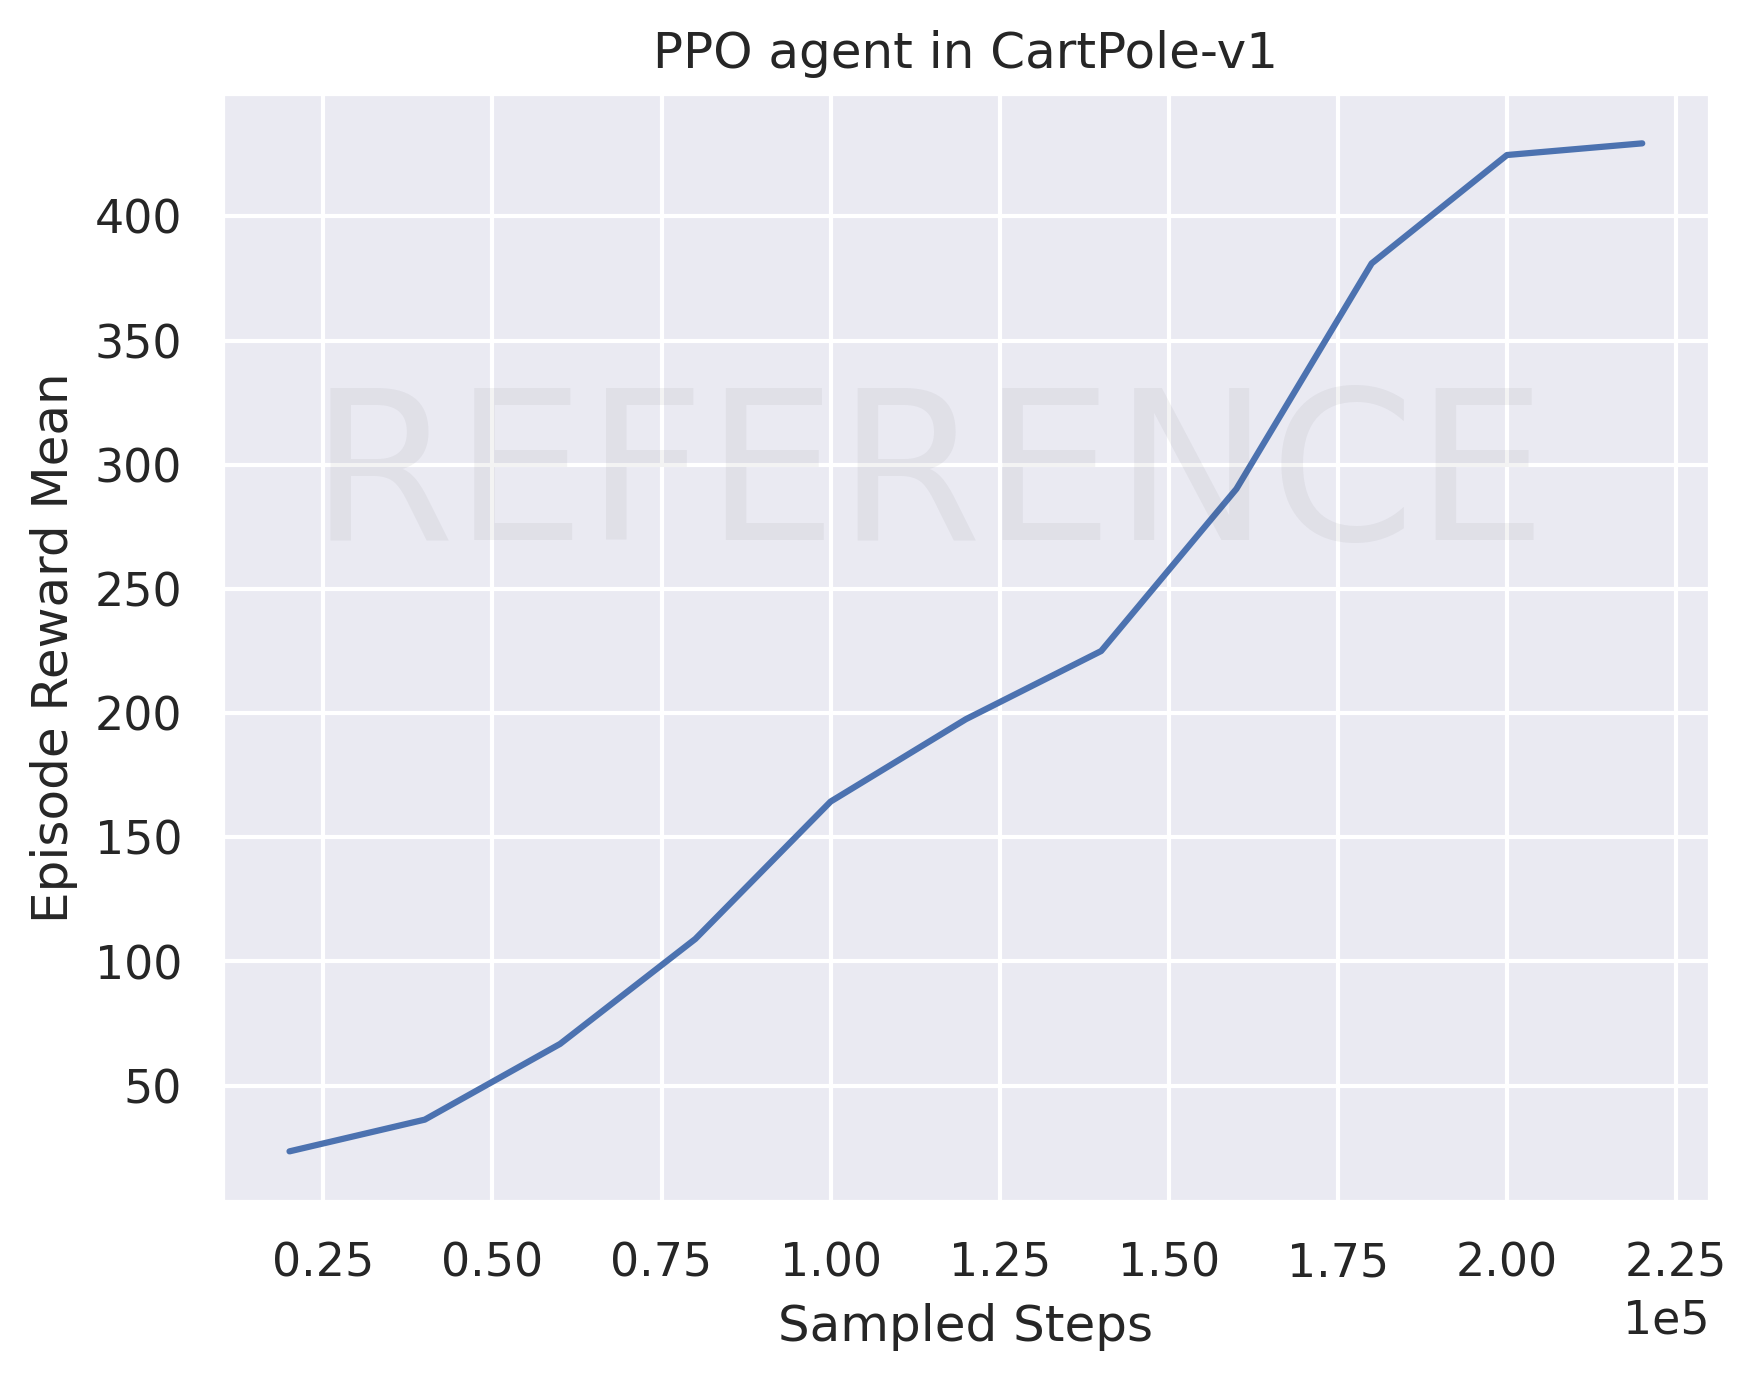

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("CartPole-v1/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in CartPole-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:
ax.annotate("REFERENCE", (ax.get_xlim()[1] / 10, ax.get_ylim()[1]*6/10), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('cartpole-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.2: Train and play with the PPO agent in MetaDrive Hard Env.

In [4]:
!python train_ppo.py \
  --env-id MetaDrive-Tut-Hard-v0 \
  --log-dir MetaDrive-Tut-Hard-v0 \
  --num-envs 10 \
  --max-steps 1_000_000

/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhengha

[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: max step 
[INFO] Episode ended! Scenario Index: 1003 Reason: max step 
[INFO] Episode ended! Scenario Index: 1016 Reason: max step 
[INFO] Episode ended! Scenario Index: 1015 Reason: max step 
[INFO] Episode ended! Scenario Index: 1010 Reason: max step 
[INFO] Episode ended! Scenario Index: 1005 Reason: max step 
[INFO] Episode ended! Scenario Index: 1018 Reason: max step 
[INFO] Episode ended! Scenario Index: 1001 Reason: max step 
[INFO] Episode ended! Scenario Index: 1018 Reason: max step 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: max step 

 ===== ppo Training Iteration 0 =====:
  adv_mean: 0.1795144826173782

[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: max step 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: max step 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: max step 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: max step 
[INFO] Episode ended! Scenario Index: 1018 Reason: m

[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.

 ===== ppo Training Iteration 8 =====:
  adv_mean: 1.7063777446746826
  entropy: 2.1473846842081117
  episode_reward: 36.392219611640414
  frame_per_second: 1204
  grad_norm: 17.11619416597562
  iteration: 8
  log_dir: /home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.007680627843365073
  ratio: 0.9998135858621353
  success_rate: 0.0
  total_episodes: 475
  total_loss: 5.753203818125603
  total_steps: 180000
  total_time: 149.4895167350769
  value_loss: 5.760884458285112

 18%|█████▊                          | 180000/1000000 [02:28<11:42, 1167.32it/s][INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.

 ===== ppo Training Iteration 9 =====:
  adv_mean: 2.321341037750244
  entropy: 2.033425126167444
  episode_reward: 47.846655258431674
  frame_per_second: 1196
  grad_norm: 30.517531009820793
  iteration: 9
  log_dir: /home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment

[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
 24%|███████▋                        | 240000/1000000 [03:30<10:45, 1176.79it/s][INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 10

[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 

[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Ind

[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.

 ===== ppo Training Iteration 19 =====:
  adv_mean: 1.756054401397705
  entropy: 1.390411272415748
  episode_reward: 131.95454546407046
  frame_per_second: 1185
  grad_norm: 430.1737051156851
  iteration: 19
  log_dir: /home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.0017123628849497973
  ratio: 0.9991494032052847
  success_rate: 0.0
  total_episodes: 1668
  total_loss: 85.32604606824043
  tot

[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index

[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
 48%|███████████████▎                | 480000/1000000 [07:00<07:28, 1159.06it/s]
 ===== ppo Training Iteration 24 =====:
  adv_mean: 1.185940146446228
  entropy: 1.2588975854409046
  episode_reward: 145.35648738008967
  frame_per_second: 1178
  grad_norm: 771.1094461294321
  iteration: 24
  log_dir: /home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -3.4288339054164215e-05
  ratio: 0.999912585203464

[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario

[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scen

 58%|██████████████████▌             | 580000/1000000 [08:14<06:14, 1122.62it/s][INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INF

[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
 58%|██████████████████▌             | 580000/1000000 [08:30<06:14, 1122.62it/s]
 ===== 

[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: crash vehicle 
[INFO] Episode ended! 

[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! 

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 

 ===== ppo Training Iteration 33 =====:
  adv_mean: 0.6971734166145325
  entropy: 1.0390669024143464
  episode_reward: 144.8812859569287
  frame_per_second: 1160
  grad_norm: 1025.4188388531024
  iteration: 33
  log_dir: /home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: -0.0016988892400732788
  ratio: 0.9992006273605885
  success_rate: 0.0
  total_episodes: 3348
  total_loss: 79.6141567474

[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: crash vehicle 
[INFO] Episode ended

[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended

[INFO] Episode ended! Scenario Index: 1016 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1010 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Sc

[INFO] Episode ended! Scenario Index: 1001 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenar

[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1001 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1012 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario I

[INFO] Episode ended! Scenario Index: 1002 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1005 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
 86%|███████████████████████████▌    | 860000/1000000 [12:40<02:09, 1085.11it/s][INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode

[INFO] Episode ended! Scenario Index: 1017 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1005 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1009 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1010 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1019 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
 88%|████████████████████████████▏   | 880000/1000000 [13:00<01:50, 1084.37it/s][INFO] Episode end

[INFO] Episode ended! Scenario Index: 1006 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1015 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1003 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1002 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: arrive_dest.
 90%|████████████████████████████▊   | 900000/1000000 [13:20<01:31, 1094.13it/s][INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1016 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1019 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1012 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1002 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1013 Reason: out_of_road.
[INFO] Episode end

 92%|█████████████████████████████▍  | 920000/1000000 [13:40<01:13, 1089.87it/s]
 ===== ppo Training Iteration 46 =====:
  adv_mean: -0.20357204973697662
  entropy: 1.0990174978207319
  episode_reward: 210.93046717801454
  frame_per_second: 1140
  grad_norm: 1262.6862733498597
  iteration: 46
  log_dir: /home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo
  policy_loss: 0.0003079443898362418
  ratio: 0.9995294015376995
  success_rate: 0.23
  total_episodes: 4603
  total_loss: 84.74177723419972
  total_steps: 940000
  total_time: 823.9273557662964
  value_loss: 84.74146942725548

 94%|██████████████████████████████  | 940000/1000000 [13:42<00:55, 1088.32it/s][INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1013 Reason: crash vehicle 
[INFO] Ep

[INFO] Episode ended! Scenario Index: 1001 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1011 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1019 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1004 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scen

[INFO] Episode ended! Scenario Index: 1003 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1014 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1007 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1012 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1017 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1000 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1018 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1016 Reason: crash vehicle 
[INFO] Episode ended! Scenario Index: 1011 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1014 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1008 Reason: arrive_dest.
[INFO] Episode ended! Scenario Index: 1011 Reason: out_of_road.
[INFO] Episode ended! Scenario Index: 1006 Reason: arrive_dest.
[INFO] Episode ended! Scenario Ind

Trainer is saved at </home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo/checkpoint-iter50.pkl>. Progress is saved at </home/zhenghao/cs260r/cs260r-2023fall-assignment-internal/2023fall/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo/progress.csv>.
1020000it [14:57, 1136.58it/s]


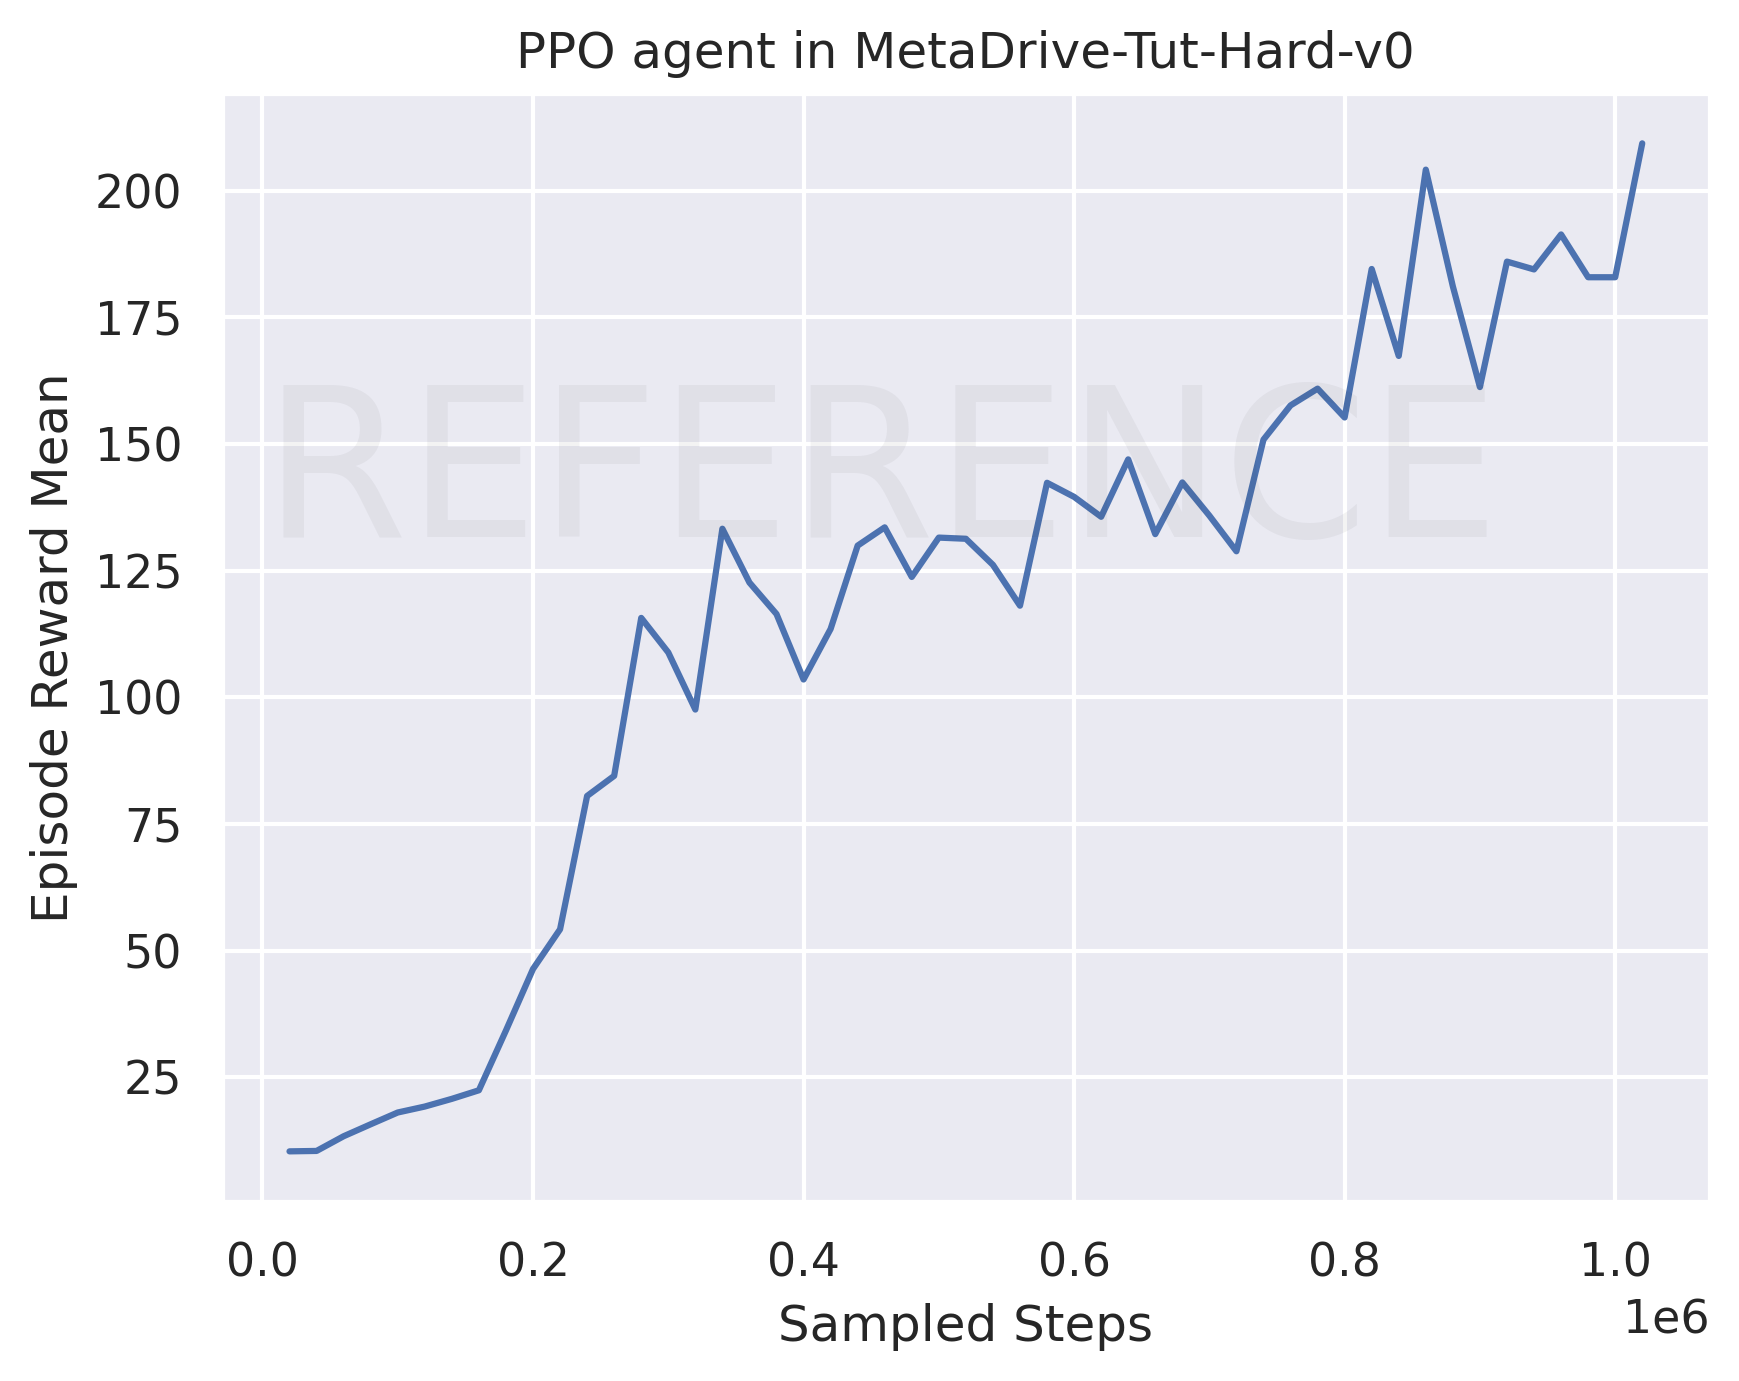

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line
ax.annotate("REFERENCE", (0, ax.get_ylim()[1]*6/10), size=50, alpha=0.05)

plt.savefig('metadrive-hard-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.3: Evaluate PPO in MetaDrive

In [5]:
!python eval_ppo.py \
  --env-id="MetaDrive-Tut-Hard-v0" \
  --log-dir="MetaDrive-Tut-Hard-v0/ppo"

/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
/home/zhenghao/anaconda3/envs/go/envs/cs260r/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/zhenghao/anaconda3/envs/go/envs/cs260r/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in re

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_eval = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/eval_results.csv")
print("PPO agent average reward: {}".format(ppo_eval.rewards.mean()))

PPO agent average reward: 177.54729633492352


### Demo 3.4: Visualize the performance of PPO in MetaDrive Hard Env.

You might have different maps in your visualization, that's expected.

In [15]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gymnasium as gym
from vis import PPOPolicy, evaluate, animate
import pygame

env_name = "MetaDrive-Tut-Hard-v0"
policy = PPOPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Tut-Hard-v0/ppo/",
    suffix="final"
)


# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    env_name=env_name,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

animate(eval_info["frames"])

print("PPO agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']


[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
/home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/core/ppo_trainer.py:210: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add

Successfully load weights from /home/zhenghao/cs260r-assignment-2025winter-internal/2025winter/assignment3-WITHSOLUTION/MetaDrive-Tut-Hard-v0/ppo/checkpoint-final.pkl!
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.008
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 27.689
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 86.940
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 123.748
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 165.781
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 193.852
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 228.523
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 283.042


[INFO] Episode ended! Scenario Index: 1000 Reason: arrive_dest.


PPO agent achieves 328.9968828556981 return in MetaDrive Hard environment.
